In [1]:
# 1.Importing all the libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import math
from scipy import stats
from scipy.stats import randint
import re
from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords 
import string
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D, CuDNNLSTM, concatenate
from keras.layers import Bidirectional, GlobalMaxPool1D, Dropout, SpatialDropout1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from tensorflow import keras
from keras.utils import to_categorical
from gensim.models.doc2vec import LabeledSentence
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import TweetTokenizer
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
# import emoji
!pip install contractions
import contractions
from sklearn.metrics import classification_report
import os
from os.path import join, exists
from keras.utils.data_utils import get_file
import sys
import time
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN
from collections import Counter
from collections import defaultdict
from nltk.stem import SnowballStemmer
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
from sklearn import neighbors
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

Using TensorFlow backend.
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\reshm\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
def confusion_matrix(cnf_matrix):    
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    return 


In [3]:
def plotting(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()   

In [4]:
# function to extract only words, by excluding punctuation and other symbols
def clean_data(review):
    review = review.lower() # convert text to lower-case
    review = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', review) # remove URLs
    review = re.sub('@[^\s]+', 'AT_USER', review) # remove usernames
    review = re.sub(r'#([^\s]+)', r'\1', review) # remove the # in #hashtag
    review = re.sub(r'\W', ' ', review) # Remove all the special characters
    review= re.sub(r'\s+[a-zA-Z]\s+', ' ', review)  # remove all single characters  
    review = re.sub(r'\^[a-zA-Z]\s+', ' ', review)  # Remove single characters from the start
    review = re.sub(r'\s+', ' ', review, flags=re.I)# Substituting multiple spaces with single space
    review =  re.sub(r"\d", "", review) #Removing Digits
    review = re.sub(r"^\s+", "", review) #Removing Spaces from Start and End
    review = contractions.fix(review) #to change words like "don't" to "do not"
    review = re.sub("([^\x00-\x7F])+"," ",review) #removing non-english words
#     review = word_tokenize(review) 
#     review = remove_stop_words(review) #remove stop words
#     review = ' '.join(review)
    return review



In [5]:
Data_path = 'questions.csv'
Data = pd.read_csv(Data_path)

In [6]:
Data.drop(Data[Data.isnull().any(axis=1)].index,inplace=True)
Data['question1'] = Data['question1'].astype('str')
Data['question2'] = Data['question2'].astype('str')
train, test = train_test_split(Data, test_size=0.1)
# train, validation = train_test_split(train, test_size=0.1)

In [7]:
train['question1'] = train.question1.apply(clean_data)
train['question2'] = train.question2.apply(clean_data)
test['question1'] = test.question1.apply(clean_data)
test['question2'] = test.question2.apply(clean_data)

In [8]:
import nltk
from nltk.corpus import stopwords
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens


In [9]:
# Combine the two question into 1 unified question set and create one combined question set.
train['questions'] = train['question1'] + " " + train['question2']
test['questions'] = test['question1'] + " " + test['question2']

In [10]:
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['questions']), tags=[r.is_duplicate]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['questions']), tags=[r.is_duplicate]), axis=1)

In [11]:
import multiprocessing
cores = multiprocessing.cpu_count()
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from sklearn import utils

In [12]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████████████████████████████████████████████████████████████████| 363913/363913 [00:01<00:00, 359494.22it/s]


In [13]:
%%time
for epoch in range(10):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████████████████████████████████████████████████████████████████| 363913/363913 [00:01<00:00, 303061.22it/s]
W0412 20:19:40.600081 25396 base_any2vec.py:1182] Effective 'alpha' higher than previous training cycles
100%|██████████████████████████████████████████████████████████████████████| 363913/363913 [00:00<00:00, 923761.59it/s]


Wall time: 10min 10s


In [14]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [15]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)


In [22]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.7350068010387041
Testing F1 score: 0.7253919959143947


Classification Report
               precision    recall  f1-score   support

           0       0.75      0.86      0.80     25441
           1       0.69      0.52      0.59     14994

    accuracy                           0.74     40435
   macro avg       0.72      0.69      0.70     40435
weighted avg       0.73      0.74      0.73     40435



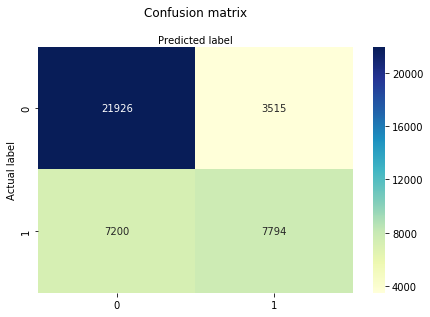

In [23]:
print('Classification Report\n',classification_report(y_test, y_pred))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)

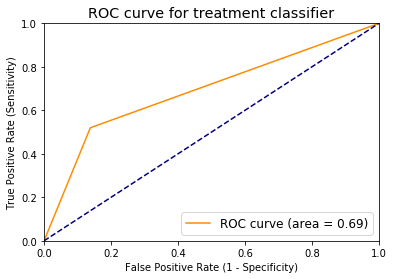

In [24]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12         
plt.title('ROC curve for treatment classifier')        
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')        
plt.legend(loc="lower right")        
plt.show()

In [16]:
forest = RandomForestClassifier(n_estimators = 20)
forest.fit(X_train,y_train)
y_pred=forest.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.7485099542475578
Testing F1 score: 0.7401874466106285


Classification Report
               precision    recall  f1-score   support

           0       0.76      0.87      0.81     25396
           1       0.71      0.55      0.62     15039

    accuracy                           0.75     40435
   macro avg       0.74      0.71      0.72     40435
weighted avg       0.74      0.75      0.74     40435



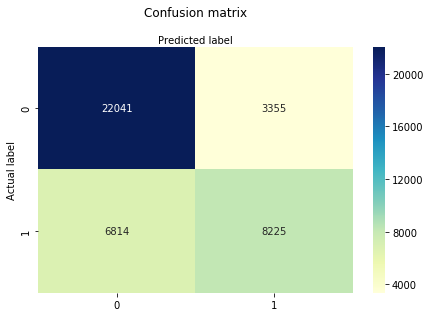

In [17]:
print('Classification Report\n',classification_report(y_test, y_pred))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)

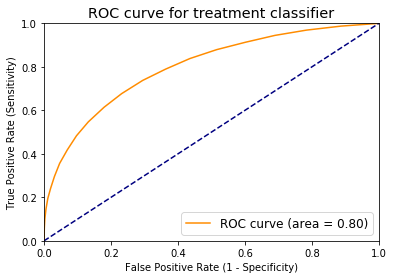

In [19]:
y_pred_proba = forest.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12         
plt.title('ROC curve for treatment classifier')        
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')        
plt.legend(loc="lower right")        
plt.show()

In [20]:
def undersampleData(train_X, train_y):
    rus = RandomUnderSampler(random_state=0)
    X_resampled, y_resampled = rus.fit_resample(train_X, train_y)
    return X_resampled, y_resampled

In [24]:
from imblearn.under_sampling import RandomUnderSampler

X_resampled, y_resampled = undersampleData(X_train, y_train)

In [25]:
forest = RandomForestClassifier(n_estimators = 20)
forest.fit(X_resampled, y_resampled)
y_pred=forest.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.7288240385804378
Testing F1 score: 0.7314720465499227


Classification Report
               precision    recall  f1-score   support

           0       0.81      0.75      0.78     25396
           1       0.62      0.69      0.66     15039

    accuracy                           0.73     40435
   macro avg       0.71      0.72      0.72     40435
weighted avg       0.74      0.73      0.73     40435



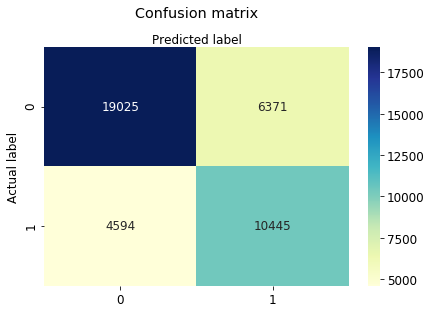

In [26]:
print('Classification Report\n',classification_report(y_test, y_pred))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)

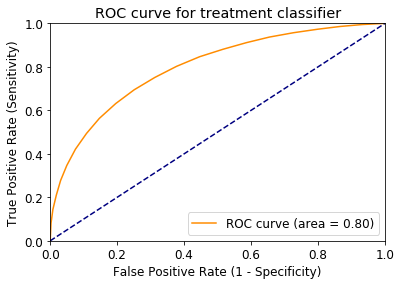

In [27]:
y_pred_proba = forest.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12         
plt.title('ROC curve for treatment classifier')        
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')        
plt.legend(loc="lower right")        
plt.show() 

In [28]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_resampled, y_resampled)
y_pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.7146036849264251
Testing F1 score: 0.7186016350466


Classification Report
               precision    recall  f1-score   support

           0       0.81      0.71      0.76     25396
           1       0.60      0.72      0.65     15039

    accuracy                           0.71     40435
   macro avg       0.70      0.72      0.70     40435
weighted avg       0.73      0.71      0.72     40435



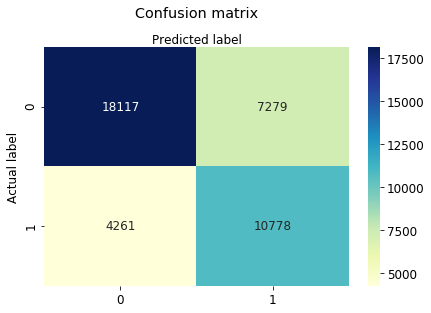

In [29]:
print('Classification Report\n',classification_report(y_test, y_pred))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)


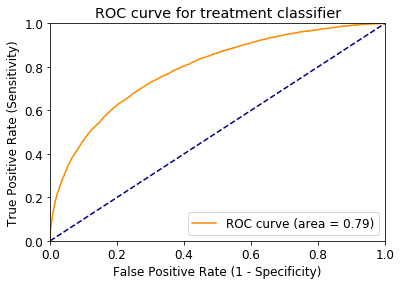

In [30]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12         
plt.title('ROC curve for treatment classifier')        
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')        
plt.legend(loc="lower right")        
plt.show() 